In [1]:
# Import necessary modules, packages
import pandas as pd
import numpy as np 

import torch
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline 
%matplotlib notebook

In [2]:
# Read the data from file into a pandas dataframe 
df = pd.read_csv('../DATA/NFHS5.csv')
print(df.head(3))
print('************\n')


print('\ndf.shape: ', df.shape)
print('************\n')

# Select only the NFHS-5 columns. Ignore error codes
nfhs5_colnames = np.array(['Q'+str(i)+'_NFHS5' for i in range(1, 105)])
nfhs4_colnames = np.array(['Q'+str(i)+'_NFHS4' for i in range(1, 105)])
nfhs5 = df[nfhs5_colnames]
nfhs4 = df[nfhs4_colnames]

# Print dataframe info to understand dtypes
# If column has dtype = object, investigate and 
# entries correct manually
print('\nnfhs5.info: \n************')
print(nfhs5.info())
print('\nnfhs5.dtypes: \n************')
print(nfhs5.dtypes)

   Unnamed: 0           State       District  Q1_NFHS5  Q2_NFHS5  Q3_NFHS5  \
0           0  Andhra_Pradesh      Anantapur      59.5      24.3      1047   
1           1  Andhra_Pradesh       Chittoor      65.6      22.6      1024   
2           2  Andhra_Pradesh  East Godavari      75.4      20.5       995   

   Q4_NFHS5  Q5_NFHS5  Q6_NFHS5  Q7_NFHS5  ...  err95_NFHS4  err96_NFHS4  \
0       881      94.3      87.2      99.6  ...            2            2   
1      1019      94.7      74.3      99.7  ...            2            2   
2       882      93.0      68.2      98.8  ...            2            2   

   err97_NFHS4  err98_NFHS4  err99_NFHS4  err100_NFHS4  err101_NFHS4  \
0            2            2            2             2             2   
1            2            2            2             2             2   
2            2            2            2             2             2   

   err102_NFHS4  err103_NFHS4  err104_NFHS4  
0             2             2             2  
1

In [3]:
nfhs5dtypes = nfhs5.dtypes
nfhs4dtypes = nfhs4.dtypes

[nfhs5dtypes[nfhs5_colnames[i]] for i in range(0, len(nfhs5_colnames)-1)] 
if any([nfhs5dtypes[nfhs5_colnames[i]]=='object' for i in range(0, len(nfhs5_colnames)-1)]):
    t = np.where([nfhs5dtypes[nfhs5_colnames[i]]=='object' for i in range(0, len(nfhs5_colnames)-1)])
    print('These columns contain data of type "object" :', nfhs5_colnames[t])
    print('Open the CSV file and correct entries manually.\n\n')
else:
    print('NFHS-5 columns do not contain entries of type "object".\n\n')
    
if any([nfhs4dtypes[nfhs4_colnames[i]]=='object' for i in range(0, len(nfhs4_colnames)-1)]):
    t = np.where([nfhs4dtypes[nfhs4_colnames[i]]=='object' for i in range(0, len(nfhs4_colnames)-1)])
    print('These columns contain data of type "object" :', nfhs4_colnames[t])
    print('Open the CSV file and correct entries manually')
else: 
    print('NFHS-4 columns do not contain entries of type "object".')

NFHS-5 columns do not contain entries of type "object".


NFHS-4 columns do not contain entries of type "object".


In [4]:
# Some states share district names
print(len(pd.unique(df['District'])))
print(df.shape)

698
(705, 419)


In [5]:
# Convert dataframe to numpy array
nfhs5_numpy = nfhs5.to_numpy()

# Print shape of array
print(nfhs5_numpy.shape)

(705, 104)


In [6]:
## Working with NaN entries
def getgood(d, ax, perc=20):   #ax = 0: return good/bad column indices
                               #ax = 1: return good/bad row indices
        
    # Find number of rows or cols
    num_elems = d.shape[ax]

    # Get a row vector whose entries denote the percentage of NaN entries in 
    # the corresponding column 
    num_nan = np.sum(np.isnan(d), axis = ax)*100/num_elems

    # Delete columns with perc % or more NaN's
    good_tf   = num_nan < perc
    good_idx  = [i for i, tf in enumerate(good_tf) if tf]


    bad_tf   = num_nan >= perc
    bad_idx  = [int(i) for i, tf in enumerate(bad_tf) if tf]

    return good_idx, bad_idx, num_nan

In [7]:
# Get the good+bad COLUMNS of nfhs5_numpy:
goodC_idx, badC_idx, numC_nan = getgood(nfhs5_numpy, ax=0, perc=20)
print('\nIndices of the bad cols: \n', badC_idx)
print('\nBad cols:')
print([nfhs5_colnames[i] for i in badC_idx])
print('\nPercentage of nan entries in bad cols: \n', numC_nan[badC_idx])


Indices of the bad cols: 
 [39, 46, 61, 62, 63, 65, 67, 68, 70]

Bad cols:
['Q40_NFHS5', 'Q47_NFHS5', 'Q62_NFHS5', 'Q63_NFHS5', 'Q64_NFHS5', 'Q66_NFHS5', 'Q68_NFHS5', 'Q69_NFHS5', 'Q71_NFHS5']

Percentage of nan entries in bad cols: 
 [59.71631206 21.41843972 69.5035461  69.5035461  69.5035461  31.4893617
 37.0212766  90.92198582 91.06382979]


In [8]:
# Get the good+bad ROWS of nfhs5_numpy:
goodR_idx, badR_idx, numR_nan = getgood(nfhs5_numpy, ax=1, perc=21)
print('Indices of the bad rows: \n', badR_idx)
print('\nBad rows:')
print([(df.iloc[i][2], df.iloc[i][1]) for i in badR_idx])
print('\nPercentage of nan entries in bad rows: \n', numR_nan[badR_idx])

Indices of the bad rows: 
 [276, 290, 301]

Bad rows:
[('Bhopal', 'Madhya_Pradesh'), ('Jabalpur', 'Madhya_Pradesh'), ('Raisen', 'Madhya_Pradesh')]

Percentage of nan entries in bad rows: 
 [21.15384615 25.         21.15384615]


In [9]:
# Eliminate only bad columns indentified in the previous step
# Do not eliminate any rows
X = nfhs5_numpy[:, goodC_idx]
print(X.shape)

(705, 95)


In [10]:
## Return a map D that takes the new question number (column number)
## and returns the old column (question) number
def Qmap(badC_idx, goodC_idx):
    n = len(badC_idx)+len(goodC_idx)
    D = {}
    i = 0
    count = 0

    for b in badC_idx:
        while i < b:
            D[i-count] = i
            i += 1
        i += 1
        count += 1

    if b < n:
        while i <= n:
            D[i-count] = i
            i += 1
        count += 1

    return D
    
D = Qmap(badC_idx, goodC_idx)
print(badC_idx)
print(D)

[39, 46, 61, 62, 63, 65, 67, 68, 70]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 47, 46: 48, 47: 49, 48: 50, 49: 51, 50: 52, 51: 53, 52: 54, 53: 55, 54: 56, 55: 57, 56: 58, 57: 59, 58: 60, 59: 64, 60: 66, 61: 69, 62: 71, 63: 72, 64: 73, 65: 74, 66: 75, 67: 76, 68: 77, 69: 78, 70: 79, 71: 80, 72: 81, 73: 82, 74: 83, 75: 84, 76: 85, 77: 86, 78: 87, 79: 88, 80: 89, 81: 90, 82: 91, 83: 92, 84: 93, 85: 94, 86: 95, 87: 96, 88: 97, 89: 98, 90: 99, 91: 100, 92: 101, 93: 102, 94: 103, 95: 104}


In [11]:
# A matrix of True/False to indicate which 
# cells contain np.nan
tf_isnan = np.isnan(X)
print(tf_isnan.shape)

(705, 95)


***
***
K-MEANS CLUSTERING
--------

In [12]:
# Standardize the data by subtracting the column 
# mean from each entry and dividing each entry by 
# its column's standard deviation
# np.nanmeans ignores np.nan entries when calculating the col 
# or row means
def stdz_and_nan2zero(X):
    
    means = np.nanmean(X, axis = 0, keepdims = True) # axis = 1 : return means of rows
                                                     # axis = 0 : return means of columns 
    stds = np.nanstd(X, axis = 0, keepdims = True) 
                                                     # keepdims = True : returns a row vector of 
                                                     # column means means when axis = 0
    Z = (X - means) / stds
    return np.nan_to_num(Z) 

In [13]:
Z_nan2zero = stdz_and_nan2zero(X)
print(Z_nan2zero.shape)
print(Z_nan2zero[0:5, 0:5])

(705, 95)
[[-1.16350535 -0.39154426  0.3629007  -0.52493673  0.34547159]
 [-0.57125173 -0.71236588  0.04793871  0.60816351  0.38806087]
 [ 0.38023771 -1.10867495 -0.34918728 -0.51672585  0.20705641]
 [-0.63921526 -0.75010961  0.4724527  -0.03228445  0.13252517]
 [ 0.24431065 -1.12754681  0.59569869  1.59346807  0.56906533]]


In [14]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, 
    init='k-means++', #init='random',
    n_init=100, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_km = km.fit_predict(Z_nan2zero)
print(km.labels_)
print(km.cluster_centers_)
print(km.inertia_)

[0 0 0 0 0 2 0 0 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 2 1 2 2 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 1 2 1 1
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 0 2 1 2 0 2 2 2
 0 2 0 0 2 0 0 2 2 2 0 0 2 0 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1
 2 1 2 0 0 2 2 2 2 0 0 0 0 0 0 0 2 2 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1
 0 2 0 0 2 2 2 1 2 2 1 0 2 0 0 0 0 2 0 2 2 2 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 2 2 2 0 0 2
 0 2 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [16]:
## Calculate distortion for a range of number of cluster
distortions = []
cluster_centers = []
t = np.linspace(50, 500, 10)
print(list(t))

for i in t:
    print('\n', i)
    km = KMeans(
        n_clusters=int(i),
        init='k-means++', #init='random',
        n_init=100, 
        max_iter=300,
        tol=1e-04, 
        random_state=0
    )
    km.fit(Z_nan2zero)
    distortions.append(km.inertia_)
    cluster_centers.append(km.cluster_centers_)
    print(km.inertia_)
    print(km.cluster_centers_)


[50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0]

 50.0
24065.912868281655
[[ 4.49588251e-01 -9.55004089e-01 -5.36990697e-01 ...  5.53082040e-01
   3.10040229e+00  2.00757776e+00]
 [ 6.70122974e-01  2.76806406e-02 -2.54307422e-01 ...  1.10291699e+00
   2.52853409e+00  1.70592308e+00]
 [-5.85815340e-01 -2.78393401e-03 -1.23236284e-01 ... -6.09542174e-01
  -3.23291628e-01 -6.19443359e-01]
 ...
 [ 9.02585991e-01 -8.19935488e-01  8.03847484e-01 ...  4.20370263e-01
  -3.93982523e-01 -2.68499758e-02]
 [-1.36932399e-01  1.01640360e-01 -2.94411278e-01 ...  4.15868690e-01
   3.30769962e+00  2.07573136e+00]
 [-4.99757622e-01 -6.38601367e-02 -7.53072853e-02 ...  1.83940775e-01
  -1.14955248e-01 -7.65716409e-01]]

 100.0
18141.48156514104
[[ 0.67090317 -0.77134045  1.45499716 ... -1.36074211 -0.42460154
   0.25913259]
 [-0.93437116  0.31426332 -0.69884073 ...  0.08227846 -0.27068445
  -0.46366881]
 [-1.94023142  2.62323544  0.74975619 ...  1.33620337 -0.41946413
  -0.95137066]

[ 50. 100. 150. 200. 250. 300. 350. 400. 450. 500.]
[24065.912868281655, 18141.48156514104, 14717.412484637684, 12143.890444954, 10074.229839877175, 8258.70522958867, 6742.675994572117, 5416.8551681080235, 4216.883077321851, 3125.612311743468]


<IPython.core.display.Javascript object>


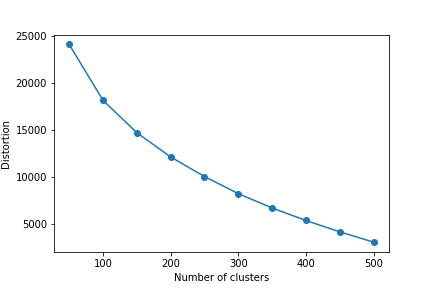

In [17]:
print(t)
print(distortions)

plt.plot(t, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

***
***

Plot $X$ in 2D and 3D using PCA
--------

In [18]:
## Perform SVD on data
def get_pca(X, r=2):
    Z = stdz_and_nan2zero(X)
    U, s, Vt = np.linalg.svd(np.transpose(Z), full_matrices=False)
    return Z @ U[:,:r]   ## 'r'-dimensional representation of X


[131, 132]


<IPython.core.display.Javascript object>


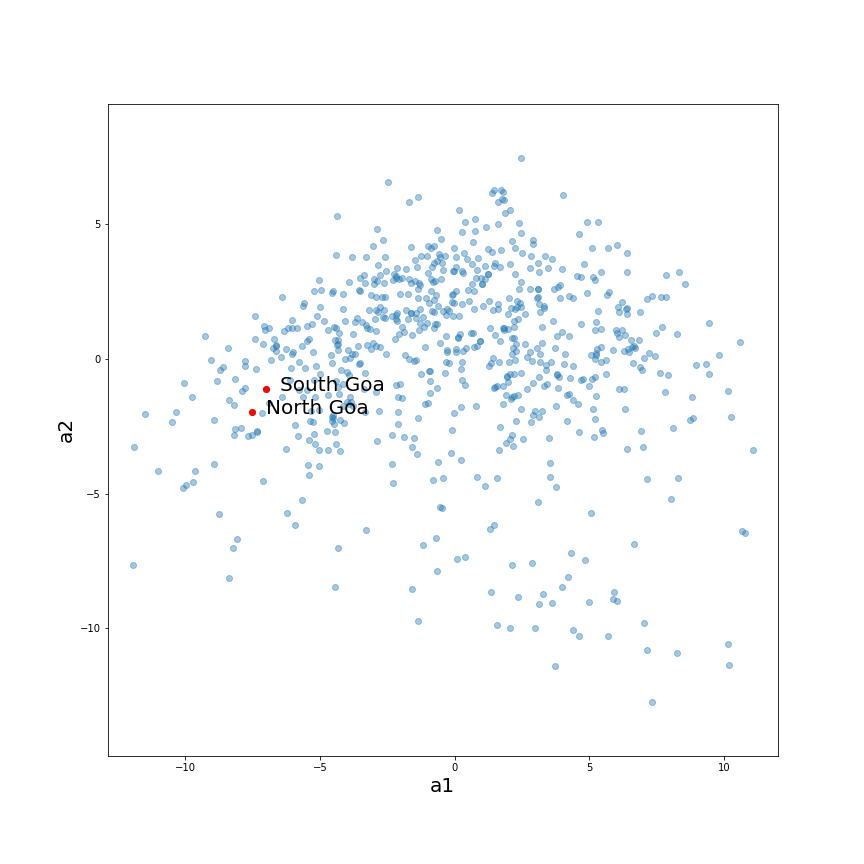

In [19]:
## Get a 2D representation of data points

# Perform PCA on X with r = 2
A = get_pca(X, 2)

# Of these points, mark the ones for the state of Mizoram
idx_state = [ i for i in range(df.shape[0]) if df.loc[i][1] == 'Goa']
print(idx_state)

plt.figure(figsize=(12, 12))
plt.scatter(A[:,0], A[:,1], marker='o', alpha = 0.4)
plt.scatter(A[idx_state,0], A[idx_state,1], marker='o', color = 'red', alpha = 1)
plt.xlabel('a1', fontsize=20)
plt.ylabel('a2', fontsize=20)
plt.axis('equal')
bottom, top = np.min(A[:,1]), np.max(A[:,1])
left, right = np.min(A[:,0]), np.max(A[:,0])
vert = top - bottom
horz = right - left
plt.xlim([left - 0.1 * horz, right + 0.1 * horz])
plt.ylim([bottom - 0.1 * vert, top + 0.1 * vert])


for i, distr_num in enumerate(idx_state):
    plt.annotate(df.loc[distr_num][2], (A[idx_state[i],0]+0.5, A[idx_state[i],1]-0.1), fontsize=20)
    
    
plt.show()

<IPython.core.display.Javascript object>


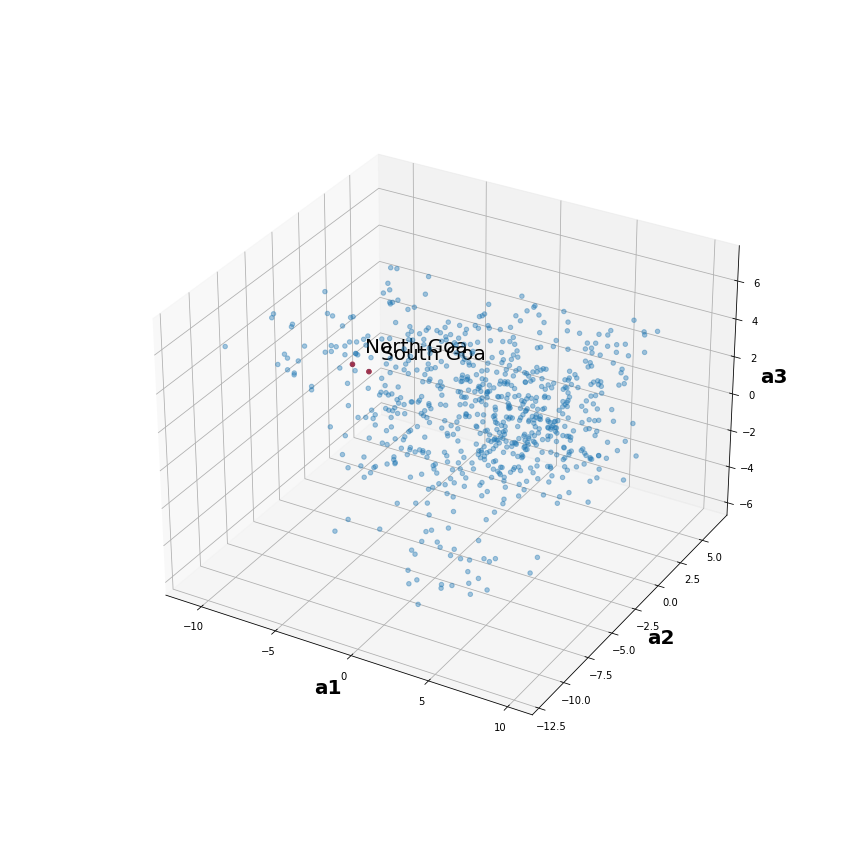

In [20]:
## Get a 3D representation of data points
A = get_pca(X, 3)

## Plot the 3-d representation of 'Z_nan2zero'
plt.figure(figsize=(12, 12))
ax = plt.axes(projection ="3d")

def set_axis_limits(a, t = 0.1):
    return [np.min(a) - t*(np.max(a) - np.min(a)), np.max(a) + t*(np.max(a) - np.min(a))]  
    
sctt = ax.scatter3D(A[:,0], A[:,1], A[:,2], marker='o', alpha = 0.4)
sctt_state = ax.scatter3D(A[idx_state,0], A[idx_state,1], A[idx_state,2], marker='o', color = 'red', alpha = 1)

for i, distr_num in enumerate(idx_state):
    ax.text(A[idx_state[i],0]+0.5, A[idx_state[i],1]+0.5, A[idx_state[i],2]+0.5, df.loc[distr_num][2] , color='black', fontsize=20)
    
ax.set_xlabel('a1', fontweight ='bold', fontsize=20)
ax.set_ylabel('a2', fontweight ='bold', fontsize=20)
ax.set_zlabel('a3', fontweight ='bold', fontsize=20)
ax.set_xlim(set_axis_limits(A[:, 0], 0))
ax.set_ylim(set_axis_limits(A[:, 1], 0))
ax.set_zlim(set_axis_limits(A[:, 2], 0))

plt.show()

***

Impute Missing Values From PCA
-------
Find the number of sigmas (squared eigen values of $X'X$) that explain a fixed percentage of the variance

In [21]:
def impute_nan(d, tf_isnan, opt_variance):
    X = d - np.nanmean(d, axis = 0, keepdims = True) # De-mean image data and perform svd
    Z = X/np.nanstd(d, axis = 0, keepdims = True)    # Scale by the standard deviation

    Z = np.nan_to_num(Z)                             # Replace nan's with zeros

    U,S,Vt = np.linalg.svd( (np.transpose(Z) @ Z)/Z.shape[0] )  # Perform SVD on var-covariance matrix of X
    var_lambdas =  np.cumsum(S)/np.cumsum(S)[len(S)-1]   # Frac. of variance explained if we retained k 
                                                         # principal comp., for k = 1:d
        
    k = np.searchsorted(var_lambdas, opt_variance)  # Find smallest k for which frac. of 
                                                    # var. explained by PCA >= opt_variance

    Z_tilde = Z @ U[:,1:k] @ np.transpose(U[:,1:k]) # Z_tilde is closest to Z (after rotating once and then back)
                                                    # Note that X_tilde is *NOT* a reduced dimension representation of X

    Z[tf_isnan] = Z_tilde[tf_isnan]       # Overwrite currupted pixels in orginal image with X_tilde

    # Rescale(multiply) by std and add back mean vector to X
    return (Z * np.nanstd(d, axis = 0, keepdims = True)) + np.nanmean(d, axis = 0, keepdims = True), k

In [32]:
X_imputed, k = impute_nan(X, tf_isnan, opt_variance = 0.99)
print(X_imputed.shape, k)

(705, 95) 70


In [33]:
df_nan = []
for r in range(tf_isnan.shape[0]):
    for c in range(tf_isnan.shape[1]):
        #if tf_isnan[r][c]:
        if np.isnan(X[r][c]):
            df_nan.append([r, c, df.iloc[r][2], df.iloc[r][1]])
            print(f'{df.iloc[r][2]:>27} , {df.iloc[r][1]:>29} : Row # {r:>5} : old Q{D[c]+1:<3},  {X_imputed[r][c]:.4f}')

              East Godavari ,                Andhra_Pradesh : Row #     2 : old Q83 ,  51.9607
                    Krishna ,                Andhra_Pradesh : Row #     4 : old Q83 ,  52.3411
                   Prakasam ,                Andhra_Pradesh : Row #     6 : old Q39 ,  2987.1206
                   Prakasam ,                Andhra_Pradesh : Row #     6 : old Q50 ,  79.2120
                   Prakasam ,                Andhra_Pradesh : Row #     6 : old Q59 ,  96.4713
                   Prakasam ,                Andhra_Pradesh : Row #     6 : old Q60 ,  1.1321
                   Prakasam ,                Andhra_Pradesh : Row #     6 : old Q83 ,  51.8550
Sri Potti Sriramulu Nellore ,                Andhra_Pradesh : Row #     7 : old Q83 ,  51.9849
                 Srikakulam ,                Andhra_Pradesh : Row #     8 : old Q83 ,  50.6709
              Visakhapatnam ,                Andhra_Pradesh : Row #     9 : old Q83 ,  51.1549
               Vizianagaram ,                Andh

            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q50 ,  78.9528
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q51 ,  92.8724
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q52 ,  75.2782
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q53 ,  83.9441
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q54 ,  83.7341
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q55 ,  27.4401
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q56 ,  34.2424
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q57 ,  77.1501
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q59 ,  97.3909
            Mumbai Suburban ,                   Maharashtra : Row #   335 : old Q60 ,  1.6213
            Mumbai Suburban ,                   Mah

                      Daman ,  Dadra_Nagar_Haveli_Daman_Diu : Row #   666 : old Q83 ,  50.8939
                    Central ,                     NCT_Delhi : Row #   668 : old Q83 ,  51.6301
                  New Delhi ,                     NCT_Delhi : Row #   670 : old Q83 ,  52.3873
                   Shahdara ,                     NCT_Delhi : Row #   674 : old Q83 ,  52.1756
                      South ,                     NCT_Delhi : Row #   675 : old Q83 ,  52.2038
                 Puducherry ,                    Puducherry : Row #   703 : old Q83 ,  53.6481
                      Yanam ,                    Puducherry : Row #   704 : old Q83 ,  52.9407


In [34]:
## Q83: Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)
# 154, 73, 'Navsari', 'Gujarat'
print(X_imputed[154][73])

#[6, 73, 'Prakasam', 'Andhra_Pradesh']
print(X_imputed[6][73])

#112, 73, 'Dhamtari', 'Chhattisgarh'
print(X_imputed[112][73])

#[293, 73, 'Khandwa (East Nimar)', 'Madhya_Pradesh']
print(X_imputed[293][73])

50.490359370731134
51.854968447630725
50.70447134259586
50.686554045603955


In [35]:
## Q54: Children age 12-23 months who have received the first dose of measles-containing vaccine (MCV) (%)
# 264, 51, 'Pathanamthitta', 'Kerala'
print(X_imputed[264][51])


#[479, 51, 'East District', 'Sikkim']
print(X_imputed[479][51])

76.93948293472414
86.24769328546623


In [36]:
X_imputed[0:3,0:3]

array([[  59.5,   24.3, 1047. ],
       [  65.6,   22.6, 1024. ],
       [  75.4,   20.5,  995. ]])

***
Saving Imputed Values To File
-----

In [37]:
tf_colnames = ['TF_Q' + str(i+1) for i in goodC_idx] 
nfhs5_imp   = list(nfhs5_colnames[goodC_idx])

In [38]:
def printmsg(b):
    # b: True (1) --> isnan; False (0) --> other than nan
    # Q: Is value from report?
    msg = ['YES', 'NO, estim. by PCA']
    return msg[b]

In [39]:
print(printmsg(True))
msg = list(map(printmsg, tf_isnan[19, :]))

NO, estim. by PCA


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  """


In [40]:
df_nfhs5 = pd.DataFrame(columns = ['State', 'District'] + nfhs5_imp + tf_colnames)

for i in range(X_imputed.shape[0]):
    df_nfhs5.loc[len(df_nfhs5.index)] = [df.iloc[i]['State'], df.iloc[i]['District']] + \
                                        list(X_imputed[i,:]) + \
                                        list(map(printmsg, tf_isnan[i, :]))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  """


In [41]:
print(nfhs5_imp)
print(tf_colnames)

['Q1_NFHS5', 'Q2_NFHS5', 'Q3_NFHS5', 'Q4_NFHS5', 'Q5_NFHS5', 'Q6_NFHS5', 'Q7_NFHS5', 'Q8_NFHS5', 'Q9_NFHS5', 'Q10_NFHS5', 'Q11_NFHS5', 'Q12_NFHS5', 'Q13_NFHS5', 'Q14_NFHS5', 'Q15_NFHS5', 'Q16_NFHS5', 'Q17_NFHS5', 'Q18_NFHS5', 'Q19_NFHS5', 'Q20_NFHS5', 'Q21_NFHS5', 'Q22_NFHS5', 'Q23_NFHS5', 'Q24_NFHS5', 'Q25_NFHS5', 'Q26_NFHS5', 'Q27_NFHS5', 'Q28_NFHS5', 'Q29_NFHS5', 'Q30_NFHS5', 'Q31_NFHS5', 'Q32_NFHS5', 'Q33_NFHS5', 'Q34_NFHS5', 'Q35_NFHS5', 'Q36_NFHS5', 'Q37_NFHS5', 'Q38_NFHS5', 'Q39_NFHS5', 'Q41_NFHS5', 'Q42_NFHS5', 'Q43_NFHS5', 'Q44_NFHS5', 'Q45_NFHS5', 'Q46_NFHS5', 'Q48_NFHS5', 'Q49_NFHS5', 'Q50_NFHS5', 'Q51_NFHS5', 'Q52_NFHS5', 'Q53_NFHS5', 'Q54_NFHS5', 'Q55_NFHS5', 'Q56_NFHS5', 'Q57_NFHS5', 'Q58_NFHS5', 'Q59_NFHS5', 'Q60_NFHS5', 'Q61_NFHS5', 'Q65_NFHS5', 'Q67_NFHS5', 'Q70_NFHS5', 'Q72_NFHS5', 'Q73_NFHS5', 'Q74_NFHS5', 'Q75_NFHS5', 'Q76_NFHS5', 'Q77_NFHS5', 'Q78_NFHS5', 'Q79_NFHS5', 'Q80_NFHS5', 'Q81_NFHS5', 'Q82_NFHS5', 'Q83_NFHS5', 'Q84_NFHS5', 'Q85_NFHS5', 'Q86_NFHS5', 'Q87_NF

In [42]:
df_nfhs5.head(3)

,State,District,Q1_NFHS5,Q2_NFHS5,Q3_NFHS5,Q4_NFHS5,Q5_NFHS5,Q6_NFHS5,Q7_NFHS5,Q8_NFHS5,...,TF_Q95,TF_Q96,TF_Q97,TF_Q98,TF_Q99,TF_Q100,TF_Q101,TF_Q102,TF_Q103,TF_Q104
0,Andhra_Pradesh,Anantapur,59.5,24.3,1047.0,881.0,94.3,87.2,99.6,98.8,...,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES
1,Andhra_Pradesh,Chittoor,65.6,22.6,1024.0,1019.0,94.7,74.3,99.7,98.5,...,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES
2,Andhra_Pradesh,East Godavari,75.4,20.5,995.0,882.0,93.0,68.2,98.8,97.9,...,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES


In [43]:
df_nfhs5.to_csv('../DATA/NFHS5_imputed.csv')

***
***
Find The Nearest PCA-Neighbors Of A Given City
------

In [44]:
from scipy.spatial.distance import squareform, pdist

In [45]:
def distr2indx(cityname):
    return df[df['District'] == cityname].index[0]
    
    
def indx2distr(indx):
    return [df.iloc[indx]['District'], df.iloc[indx]['State']]


def get_nnb(cityname, num = 5, pca = False, reduced_dim = 2):
    # Returns names and distances of `num` nearest neighbors of `cityname` 
    # where distance is computed from distance matrix `dist_mat`
    
    # First impute the missing entries:
    X_imputed, k = impute_nan(X, tf_isnan, opt_variance = 0.99)
    print(k)
    
    # Perform PCA to get a lower dimensional representation
    if pca:
        A = get_pca(X_imputed, r = reduced_dim)
        # Recall that A is already shifted and scaled to get mean = 0 and std = 1
        Y_imputed = pdist(A, metric='euclidean')
    else:
        # Recall that X_imputed has not been shifted and scaled to get mean = 0 and std = 1
        Z_imputed = (X_imputed - np.nanmean(X_imputed, axis = 0, keepdims = True)) / np.nanstd(X_imputed, axis = 0, keepdims = True)
        Y_imputed = pdist(Z_imputed, metric='euclidean')

    dist_mat = squareform(Y_imputed)
    indx = distr2indx(cityname)
    t = dist_mat[indx, :]
    idx = np.argsort(t)
    
    return [(indx2distr(idx[i]), idx[i], t[idx[i]]) for i in range(1,num+2)]
    

In [46]:
## Get 10 nearest neighbors of Pune from the reduced dimension pca matrix
get_nnb('Pune', num = 10, pca = True, reduced_dim = 70)

70


[(['Thane', 'Maharashtra'], 351, 8.177338994158674),
 (['Jalgaon', 'Maharashtra'], 331, 9.041204181876322),
 (['Nashik', 'Maharashtra'], 340, 9.13753230449924),
 (['Aurangabad', 'Maharashtra'], 322, 9.278800059667278),
 (['Sangli', 'Maharashtra'], 347, 9.279842528562456),
 (['Dhule', 'Maharashtra'], 327, 9.286726011424285),
 (['Akola', 'Maharashtra'], 320, 9.45623454107173),
 (['Jalna', 'Maharashtra'], 332, 9.991426379149589),
 (['Mumbai Suburban', 'Maharashtra'], 335, 10.030697415256558),
 (['Ahmednagar', 'Maharashtra'], 319, 10.108196590081791),
 (['Nanded', 'Maharashtra'], 338, 10.164460338226808)]

In [47]:
## Get 10 nearest neighbors of Pune from the full sized matrix
get_nnb('South Goa', num = 10)

70


[(['North Goa', 'Goa'], 131, 6.110762075010222),
 (['Mumbai', 'Maharashtra'], 336, 7.411226753676969),
 (['Tiruppur', 'Tamil_Nadu'], 510, 8.349331932803823),
 (['Mumbai Suburban', 'Maharashtra'], 335, 8.434305180290538),
 (['Wayanad', 'Kerala'], 267, 8.724752470846585),
 (['Ernakulam', 'Kerala'], 255, 8.790406063516688),
 (['Dehradun', 'Uttarakhand'], 633, 8.928473929296256),
 (['Sahibzada Ajit Singh Nagar', 'Punjab'], 442, 9.119536515245398),
 (['Rupnagar', 'Punjab'], 441, 9.175507992987042),
 (['Panchkula', 'Haryana'], 181, 9.351918306573534),
 (['Bhopal', 'Madhya_Pradesh'], 276, 9.352496145046379)]